Historic changes: how do the 'top' keywords change in time, and how do pairings of words change? E.g., 'ultracold' and 'lattice' should surge in popularity at some point.

This notebooks focuses on atom-ph

In [2]:
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../')

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
from nltk.corpus import stopwords
s=stopwords.words('english') + ['']

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_, and_

engine = create_engine("sqlite:///../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [3]:
query = session.query(Article_Category)\
                    .join(Category)\
                    .join(Article)\
                    .filter(Category.name.like('%atom-ph')).order_by(Article.created)
results = query.all()
print len(results)

2075


Bin by quarter ('created', NOT oai's datestamp)

In [4]:
first = results[0].article.created
last = results[-1].article.created
currentDate = date(first.year, first.month - (first.month % 3), 1)
datelist = []

while currentDate < (last + relativedelta(months=3)):
    datelist.append(currentDate)
    currentDate += relativedelta(months=3)


In [22]:
abstracts = []

start = time.time()
for (fromdate, todate) in zip(datelist[0:-1], datelist[1:]):
#     print(fromdate, todate)
    currentResult = query.filter(Article.created >= fromdate, Article.created < todate).all()
    currentWordList = dict()
    
    for item in currentResult:
        for word in set((item.article.abstract).replace('\n',' ') \
                                       .replace('\\','') \
                                       .replace('(','') \
                                       .replace(')','') \
                                       .lower() \
                                       .split(' ')):
            if (word not in s) and (word.isalpha()):
                if word in currentWordList.keys():
                    currentWordList[word] += 1
                else:
                    currentWordList[word] = 1
    abstracts.append(currentWordList)
total_time = time.time() - start
print "%0.0f articles per second (%i articles, %i seconds)" \
    % ( len(results)/total_time, len(results), total_time )

47 articles per second (2075 articles, 43 seconds)


How often do particular words show up over time? This should be replaced with an algorithm that chooses the most common words.

In [63]:
favorite_words = ['ultracold', 'ultrafast', 'attosecond', 'lattice', 'nuclear','quantum']
word_frequency = dict([(x, []) for x in favorite_words])

for item in abstracts:
    for word in favorite_words:
        numWords = 0
        if word in item.keys():
            numWords += item[word]
#        word_frequency[word].append(numWords)
        word_frequency[word].append(numWords*1./sum(item.values()))


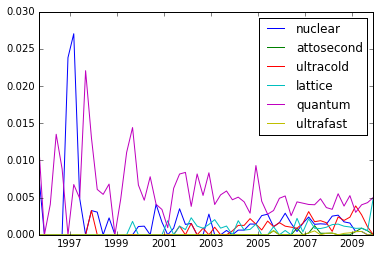

In [64]:
for key, val in word_frequency.iteritems():
    plt.plot(datelist[:-1], val, label=key)
plt.legend(loc=0)

In [44]:
for item in abstracts:
    print sorted(zip(item.keys(), item.values()), key=lambda x: -x[1])[0]
#     for word in favorite_words:
#         numWords = 0
#         if word in item.keys():
#             numWords += item[word]
#         word_frequency[word].append(numWords)
        


(u'compared', 4)
(u'atomic', 7)
(u'states', 6)
(u'using', 5)
(u'energy', 2)
(u'energy', 2)
(u'nuclear', 4)
(u'results', 2)
(u'quantum', 3)
(u'quantum', 4)
(u'energy', 4)
(u'atomic', 5)
(u'theory', 5)
(u'also', 5)
(u'compared', 5)
(u'results', 3)
(u'states', 8)
(u'atomic', 7)
(u'atomic', 7)
(u'atoms', 10)
(u'energy', 9)
(u'using', 9)
(u'theoretical', 8)
(u'interaction', 10)
(u'atomic', 8)
(u'quantum', 12)
(u'atoms', 12)
(u'quantum', 7)
(u'using', 12)
(u'quantum', 6)
(u'atoms', 8)
(u'atoms', 8)
(u'state', 13)
(u'states', 13)
(u'atomic', 11)
(u'atoms', 13)
(u'results', 11)
(u'atoms', 15)
(u'atoms', 11)
(u'results', 9)
(u'atomic', 16)
(u'atoms', 16)
(u'used', 11)
(u'results', 14)
(u'energy', 14)
(u'state', 17)
(u'atoms', 28)
(u'using', 41)
(u'using', 35)
(u'atoms', 33)
(u'laser', 27)
(u'using', 27)
(u'using', 39)
(u'using', 35)
(u'using', 18)
(u'atoms', 17)
(u'also', 15)
(u'field', 3)
